# Basic Plotting

First, import the library along with numpy to help generate data:

In [1]:
# Changing this notebook's working directory to access files in the library
import os
os.chdir("/Users/yannicklapointe/Desktop/PROG/MyLibraries/GraphingLib")

import graphinglib as gl
import numpy as np
import matplotlib.pyplot as plt # Not necessary, just imported for practical reasons in this notebook
# plt.close()

Plot a simple scatter plot by creating a Scatter object:

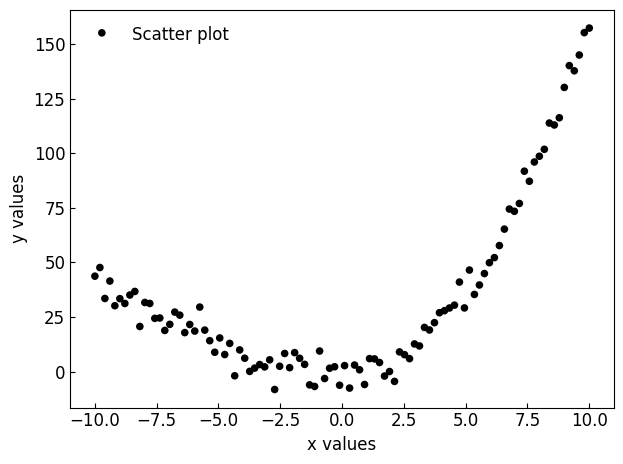

In [2]:
# Create some noisy random data :
x_data = np.linspace(-10, 10, 100)
noise = np.random.normal(0, 5, len(x_data))
y_data = 0.05 * x_data ** 3 + x_data ** 2 + x_data + noise

# Create the Scatter object
scatter = gl.Scatter(x_data, y_data, label="Scatter plot")

# Create the figure object and add the Scatter object to the figure
fig_1 = gl.Figure(x_label="x values", y_label="y values")
fig_1.add_element(scatter)

# Display the figure
fig_1.display()

Use the Curve object to represent the same data:

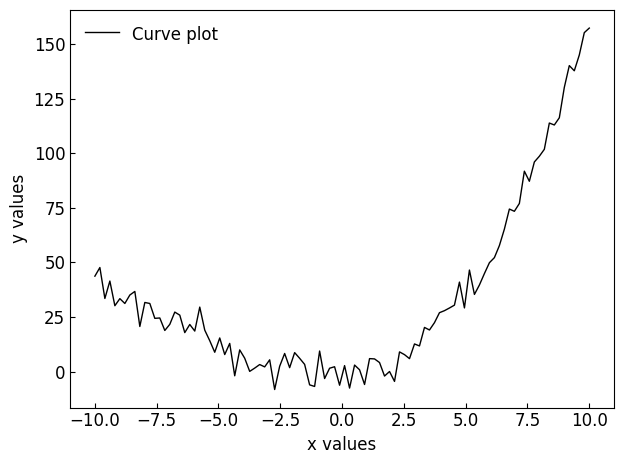

In [3]:
# Create the Curve object
curve = gl.Curve(x_data, y_data, label="Curve plot")

# Create the figure object and add the Curve object to the figure
fig_2 = gl.Figure(x_label="x values", y_label="y values")
fig_2.add_element(curve)
fig_2.display()

Create a Curve (or Scatter) object from a function instead of using arrays of data:

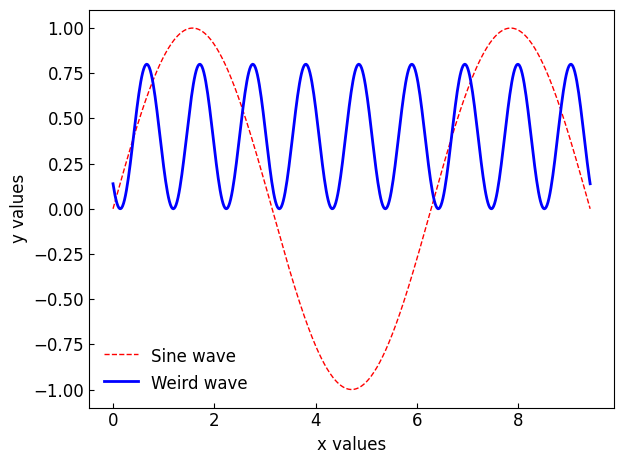

In [4]:
sine_wave = gl.Curve.from_function(lambda x: np.sin(x), xmin=0, xmax=3*np.pi, label="Sine wave", color="red", line_style="--")

def weird_cosine(x):
    return 0.8*np.cos(3*x - 2)**2

weird_wave = gl.Curve.from_function(weird_cosine, xmin=0, xmax=3*np.pi, label="Weird wave", color="blue", line_width=2)

fig_4 = gl.Figure("x values", "y values")
fig_4.add_element(sine_wave, weird_wave)
fig_4.display()

Create a histogram from a list of values. The mean and standard deviation are calculated and displayed in the legend (this behaviour can be turned off using ```show_params=False```).

Histogram mean: 2.077350383835074
Histogram standard deviation: 4.762786977663212


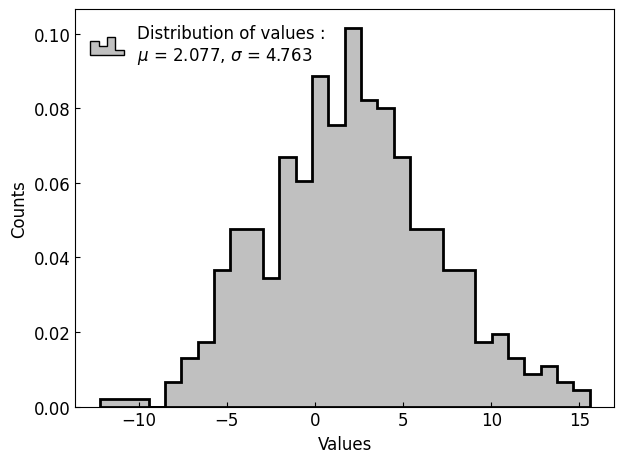

In [5]:
# Create the list of values
values = np.random.normal(loc=2, scale=5, size=500)

# Create the Histogram object. The optional "show_pdf" parameter overlays a normal distribution curve.
histo = gl.Histogram(values, number_of_bins=30, label="Distribution of values")

# Access mean and standard deviation
print(f"Histogram mean: {histo.mean}")
print(f"Histogram standard deviation: {histo.standard_deviation}")

# Create the Figure object and add the histogram to the figure
fig_3 = gl.Figure(x_label="Values", y_label="Counts")
fig_3.add_element(histo)
fig_3.display()

The histogram is normalized by default. Use the ```normalize``` parameter to turn this feature off. A normal distribution curve can also be overlayed onto the histogram using the ```show_pdf``` parameter. The mean and standard deviation are plotted with dotted lines.

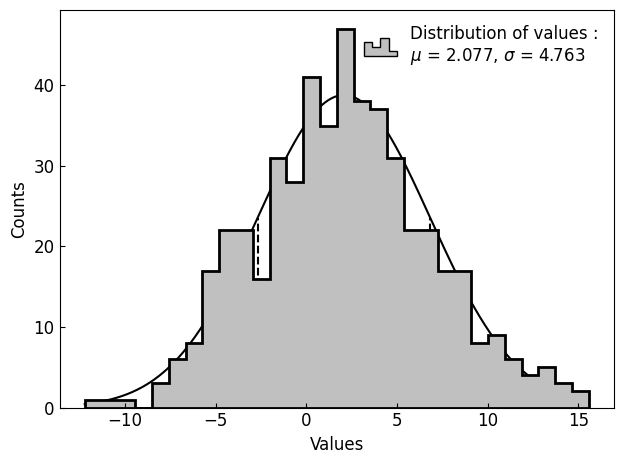

In [6]:
histo = gl.Histogram(values, number_of_bins=30, label="Distribution of values", show_pdf="normal", normalize=False)

# Create the Figure object and add the histogram to the figure
fig_3 = gl.Figure(x_label="Values", y_label="Counts")
fig_3.add_element(histo)
fig_3.display()

## Default values and figure styles

Much of GraphingLib's advantage is that it relies heavily on default values for most parameters to reduce the amount of information you need to provide to quickly create a curve. Default parameters cover everything from curve colour to histogram opacity to figure dimensions. A set of default values is grouped together as a ```figure_style```. The figure style can be specified as a parameter while creating the Figure object.

In [7]:
# A figure using the "plain" style
figure_plain = gl.Figure(figure_style="plain")

# A figure using the "weird" style
figure_weird = gl.Figure(figure_style="horrible")

If no figure style is specified, GraphingLib will use the "plain" style. New styles can be created by creating your own style file and adding it to the following directory:

**site-packages/graphinglib{version}/default_styles/**

The parameters set in the selected ```figure_style``` are used to define every parameter that hasn't been specified the user. These parameters can therefore be overridden by simply passing the desired values to the appropriate object.

In [8]:
# Creating a curve using all the default values
curve_1 = gl.Curve(x_data, y_data, "A curve")

# Creating a curve using the default values but overriding the default color
curve_2 = gl.Curve(x_data, y_data, "A curve", color="yellow")

figure = gl.Figure(figure_style="plain")
figure.add_element(curve_1, curve_2)

Here, ```curve_1``` will be drawn using whatever ```figure_style``` is specified when creating the Figure object. Using the "plain" style, the curve will be black with a ```line_width``` of 1.

Since ```curve_2```'s ```line_width``` is not specified, it will also be 1 as defined in the "plain" style, but it's color will be set to yellow.

## Using $\LaTeX$

$\LaTeX$ can be used to compile the text of the figure. To be able to use this functionnality, it is necessary to have a $\TeX$ distribution installed locally. If you do not have such a distribution installed, you can visit **[this page](https://www.latex-project.org/get/#tex-distributions)** to see the ones available for your system.

The use of $\LaTeX$ can be specified for each Figure object created by the parameter ```use_latex```. When used it can give the following results:

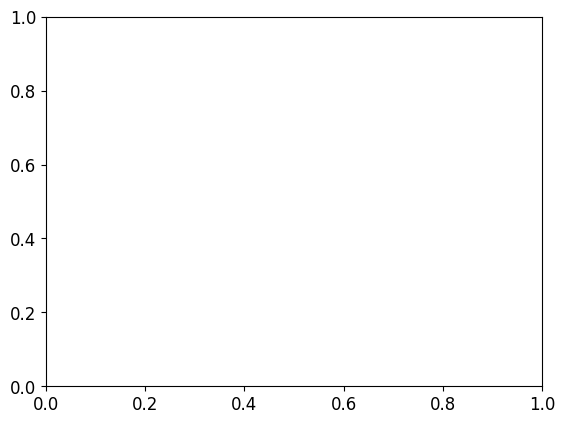

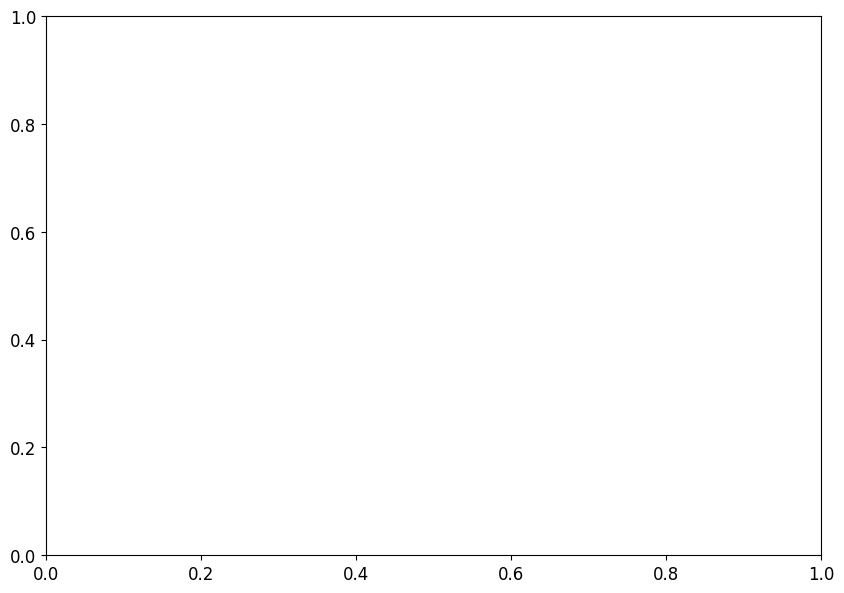

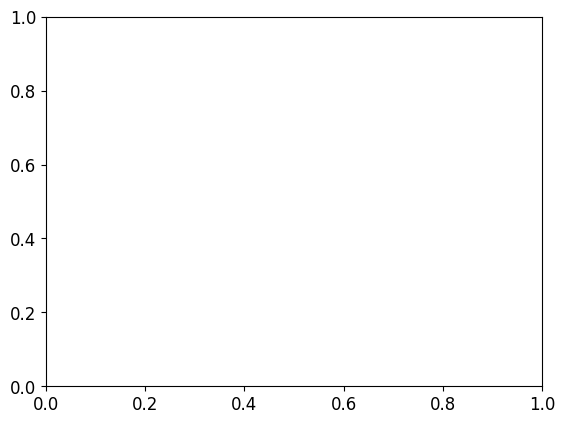

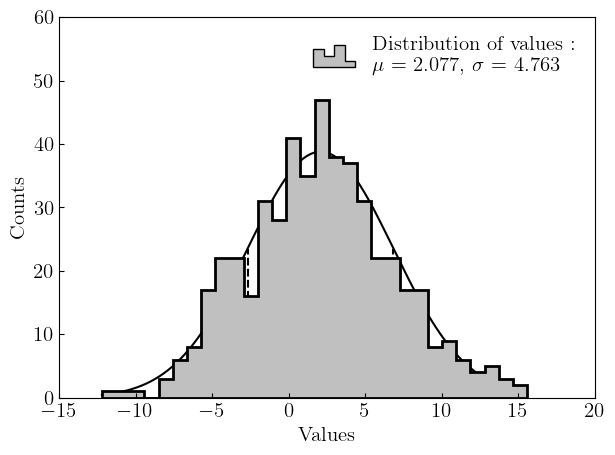

In [9]:
histo = gl.Histogram(values, number_of_bins=30, label="Distribution of values", show_pdf="normal", normalize=False)

# Create the Figure object and add the histogram to the figure
fig_3 = gl.Figure(x_label="Values", y_label="Counts", x_lim=(-15, 20), y_lim=(0, 60), use_latex=True)
fig_3.add_element(histo)
fig_3.display()